## Hypothesis
DV2=HabitC=mean(HabitC5,HabitC6,HabitC7)

In [64]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3 
232 261 331 

In [65]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      
[1] "Summer_avgF" "42"         
[1] "Winter_avgF" "42"         
[1] "Summer_avgC" "42"         
[1] "Winter_avgC" "42"         
[1] "Summer_avg" "42"        
[1] "Winter_avg" "42"        


In [66]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826 104
[1] 597 104


In [67]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
#"Frugal",
"MC",
"EnergyC",
#"Trust",
"ComfNS",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude")

In [68]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"        "Atti"       "ComfNS"     "ComfNW"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "PBC"        "Political"  "SN"         "SqftCate"   "SubNorm"

In [69]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [70]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [71]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "EnergyC"    "PBC"        "MC"         "ComfNS"    
[16] "ComfNW"     "Atti"       "SubNorm"    "SN"         "HabitG"    
[21] "HabitC"

In [72]:
data1 [is.na(data1$IncHomeS), ]

Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,...,EnergyC,PBC,MC,ComfNS,ComfNW,Atti,SubNorm,SN,HabitG,HabitC


In [73]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 50  41 115 202  54  56  45  34 


  1   2   3   4   5 
 66 213 133 111  74 

In [74]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "EnergyC"    "PBC"        "MC"         "ComfNS"    
[16] "ComfNW"     "Atti"       "SubNorm"    "SN"         "HabitG"    
[21] "HabitC"

In [75]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [76]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      1.81      11.21       0.50       0.52       1.12       1.21       0.83 
    Ethnic     Income       Educ   Latitude    EnergyC        PBC         MC 
      0.38       2.00       1.10       5.11       1.39       0.94       1.08 
    ComfNS     ComfNW       Atti    SubNorm         SN     HabitG     HabitC 
      1.46       1.74       1.10       1.35       1.41       1.17       1.42

In [77]:
hiCor(data2,.4)

,OwnRent,SqftCate,EnergyC,MC,Atti
OwnRent,1.000,0.500,-0.053,0.049,-0.013
SqftCate,0.500,1.000,-0.078,-0.017,-0.024
EnergyC,-0.053,-0.078,1.000,0.309,0.571
MC,0.049,-0.017,0.309,1.000,0.426
Atti,-0.013,-0.024,0.571,0.426,1.000


In [78]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:19];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:19){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    EnergyC   PBC    MC  Atti SubNorm   SN HabitG HabitC
PC1    -0.4 -0.24 -0.33 -0.43   -0.36 -0.2  -0.31  -0.29
[1] 0.25
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.35    -0.5    -0.51      -0.27  -0.42
[1] 0.33
    IncHomeS Gender HouseholdS Ethnic  Educ ComfNS ComfNW HabitC
PC3     0.26   0.38       0.34   -0.3 -0.32   0.31   0.44  -0.27
[1] 0.39
    IncHomeS   Age HouseholdS Political Ethnic Latitude EnergyC   PBC    MC
PC4    -0.31 -0.25       0.26      0.31  -0.22      0.3    0.22 -0.37 -0.23
    ComfNS HabitG
PC4  -0.37  -0.25
[1] 0.46
    IncHomeS  Age HouseholdS Political Educ Latitude EnergyC HabitG
PC5     0.39 0.26      -0.35      0.43 0.41    -0.23     0.2  -0.24
[1] 0.51
     Age Gender Ethnic Latitude    SN HabitC
PC6 0.28    0.4   0.52     0.42 -0.32  -0.22
[1] 0.56
    IncHomeS OwnRent Ethnic Latitude ComfNS SubNorm   SN
PC7     0.24   -0.23    0.3     0.32   0.33    0.41 0.49
[1] 0.61
    IncHomeS   Age Gender Income Educ  PBC   MC ComfNW HabitC
PC8 

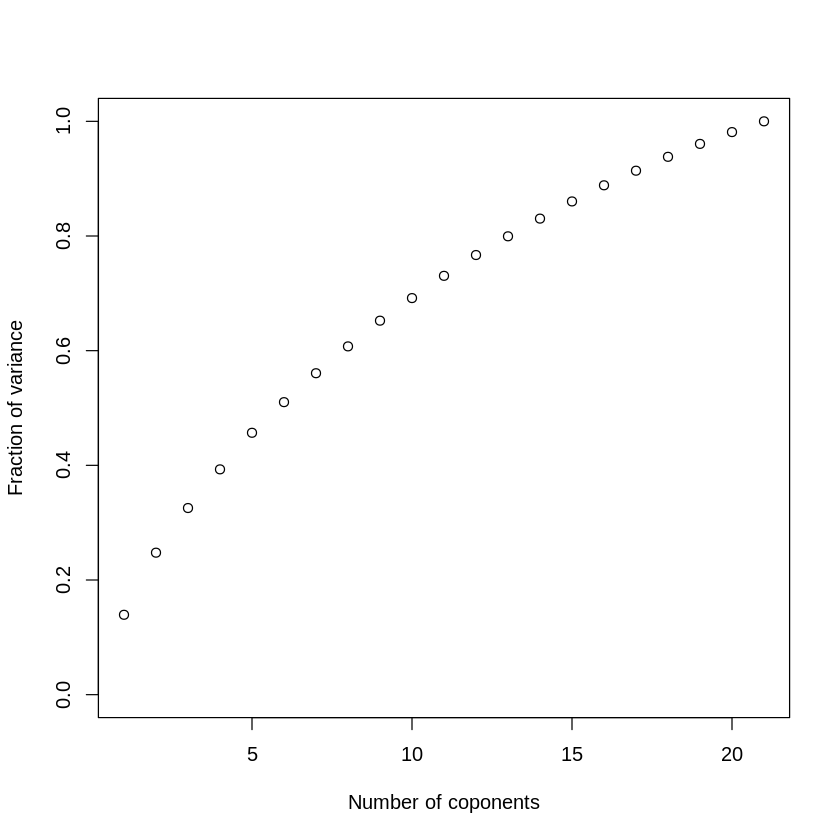

In [79]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [80]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [81]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,17,0.43
EnergyC,12,0.40
SqftCate,5,0.38
OwnRent,4,0.33
SubNorm,18,0.27
HouseholdS,6,0.26
Income,9,0.26
HabitC,21,0.26
MC,14,0.24
HabitG,20,0.23
Age,2,0.20


In [82]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [83]:
IndepPred = c('Atti', 'Age', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SN', 'Educ', 'PBC', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')

In [84]:
fmla <- as.formula(paste("HabitC",paste(IndepPred,collapse="+"),sep="~"));

In [85]:
table(data2[,"HabitC"])


               1 1.33333333333333 1.66666666666667                2 
               8                3                5                7 
2.33333333333333 2.66666666666667                3 3.33333333333333 
              13                8               29               22 
3.66666666666667                4 4.33333333333333 4.66666666666667 
              30               35               56               56 
               5 5.33333333333333 5.66666666666667                6 
              57               52               41               43 
6.33333333333333 6.66666666666667                7 7.33333333333333 
              38               32               55                4 
7.66666666666667                8 
               1                2 

In [86]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-5.022 -0.772  0.054  0.954  3.098 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.386723   0.742854    3.21  0.00139 ** 
Atti         0.089598   0.065660    1.36  0.17291    
Age          0.003590   0.005482    0.65  0.51281    
EnergyC      0.000829   0.049177    0.02  0.98656    
SqftCate     0.138412   0.062422    2.22  0.02699 *  
OwnRent     -0.047649   0.129199   -0.37  0.71241    
MC           0.126794   0.056936    2.23  0.02633 *  
HouseholdS  -0.130516   0.052114   -2.50  0.01254 *  
Income      -0.010997   0.031983   -0.34  0.73110    
SN           0.134976   0.040693    3.32  0.00097 ***
Educ         0.089816   0.053698    1.67  0.09494 .  
PBC          0.174066   0.063089    2.76  0.00598 ** 
Gender       0.078989   0.117459    0.67  0.50155    
ComfNS      -0.159250   0.039188   -4.06  5.5e-05 ***
Latitude     0.004619   0.011087    0.42  0.67708  

In [87]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,4.4e+01,43.6246,24.1028,1.2e-06
Age,1,3.0e+00,3.0393,1.6793,2.0e-01
EnergyC,1,1.4e+00,1.3885,0.7671,3.8e-01
SqftCate,1,3.6e+00,3.5759,1.9757,1.6e-01
OwnRent,1,1.8e-03,0.0018,0.0010,9.7e-01
MC,1,1.8e+01,18.2031,10.0573,1.6e-03
HouseholdS,1,1.6e+01,15.8915,8.7802,3.2e-03
Income,1,1.4e-02,0.0140,0.0077,9.3e-01
SN,1,2.1e+01,21.2112,11.7193,6.6e-04
Educ,1,6.2e+00,6.2207,3.4370,6.4e-02


In [88]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.97       0.85       0.93       0.56       0.44       0.87       0.92 
    Ethnic     Income       Educ   Latitude    EnergyC        PBC         MC 
      0.98       0.73       0.97       0.99       0.55       0.90       0.77 
    ComfNS     ComfNW       Atti    SubNorm         SN     HabitG     HabitC 
      0.95       0.98       0.44       0.74       0.90       0.84       0.87 

Loadings:
           Factor1 Factor2
EnergyC     0.67          
Atti        0.75          
SubNorm     0.51          
OwnRent             0.67  
SqftCate            0.75  
Income              0.51  
IncHomeS                  
Age                 0.39  
Gender                    
HouseholdS          0.36  
Political                 
Ethnic                    
Educ                      
Latitude                  
PBC         0.30          
MC          

In [89]:
#model without age
IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitG', 'Educ', 'Political', 'Gender', 'ComfNS', 'ComfNW', 'Latitude', 'Ethnic')
fmla <- as.formula(paste("HabitC",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.777 -0.817  0.024  0.833  3.483 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.23e+00   6.96e-01    4.63  4.5e-06 ***
Atti         6.57e-02   6.07e-02    1.08    0.279    
EnergyC     -6.84e-02   4.73e-02   -1.45    0.148    
SqftCate     1.17e-01   5.74e-02    2.03    0.043 *  
OwnRent      2.58e-05   1.16e-01    0.00    1.000    
MC           4.76e-02   5.37e-02    0.89    0.376    
HouseholdS  -9.14e-02   4.81e-02   -1.90    0.058 .  
Income      -3.11e-03   2.97e-02   -0.10    0.917    
SubNorm      1.87e-01   4.22e-02    4.42  1.2e-05 ***
HabitG       2.78e-01   4.79e-02    5.81  1.0e-08 ***
Educ         8.61e-02   5.04e-02    1.71    0.088 .  
Political   -9.75e-02   6.68e-02   -1.46    0.145    
Gender       2.02e-01   1.09e-01    1.85    0.065 .  
ComfNS      -1.03e-01   3.65e-02   -2.82    0.005 ** 
ComfNW      -2.25e-01   3.10e-02   -7.27  1.2e-12 *

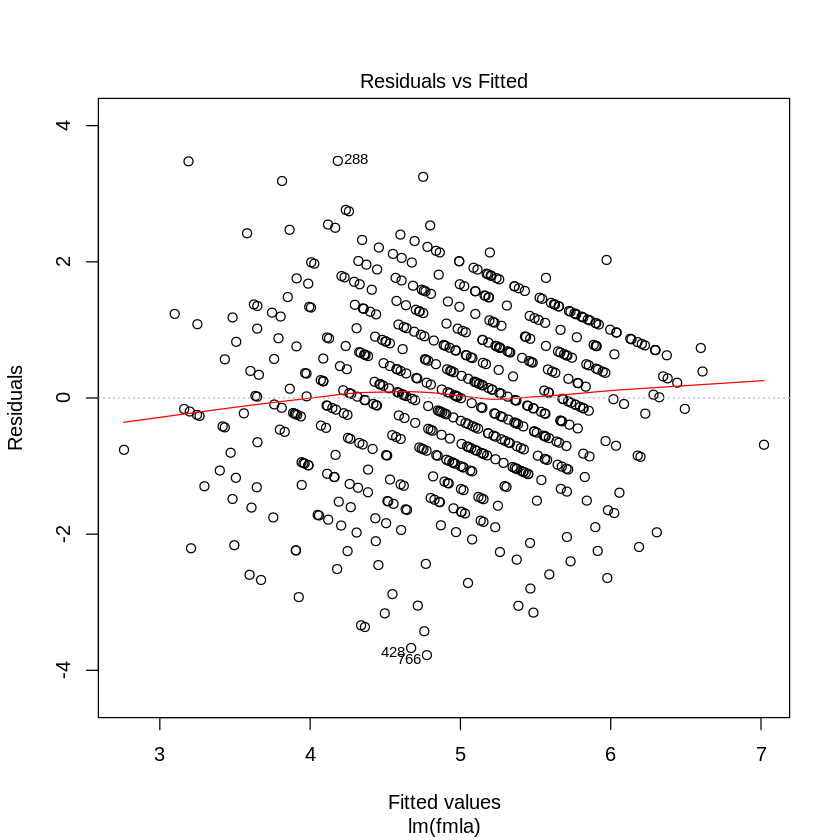

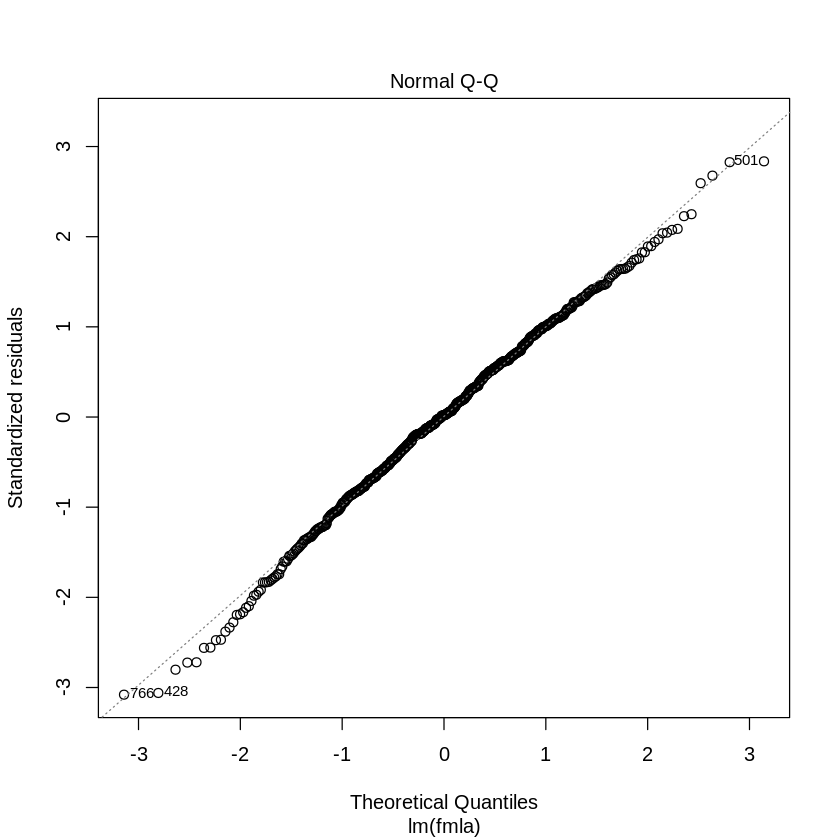

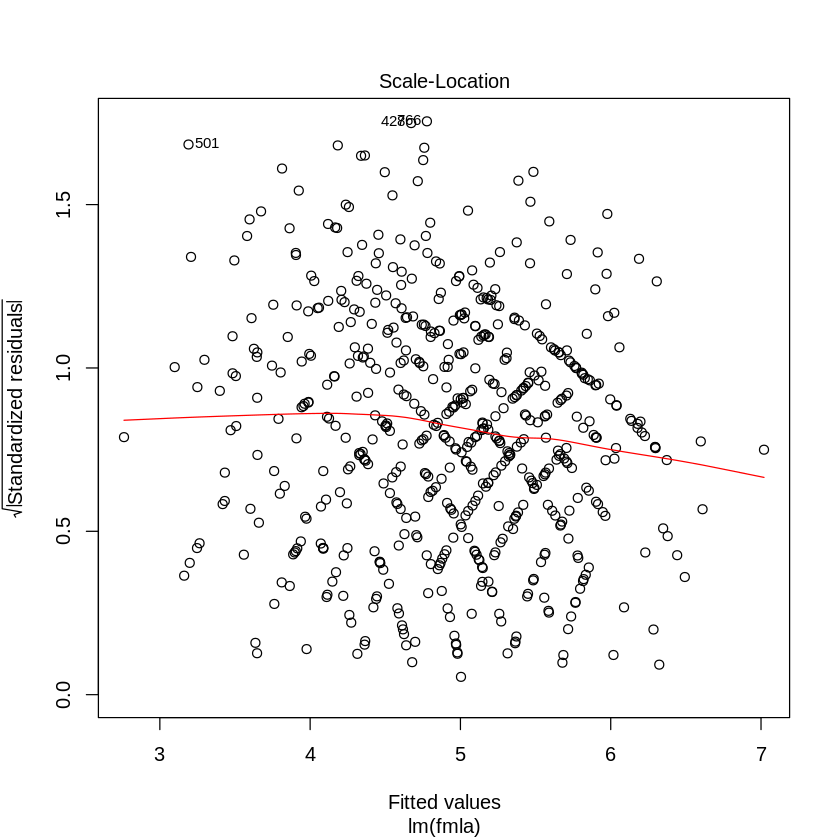

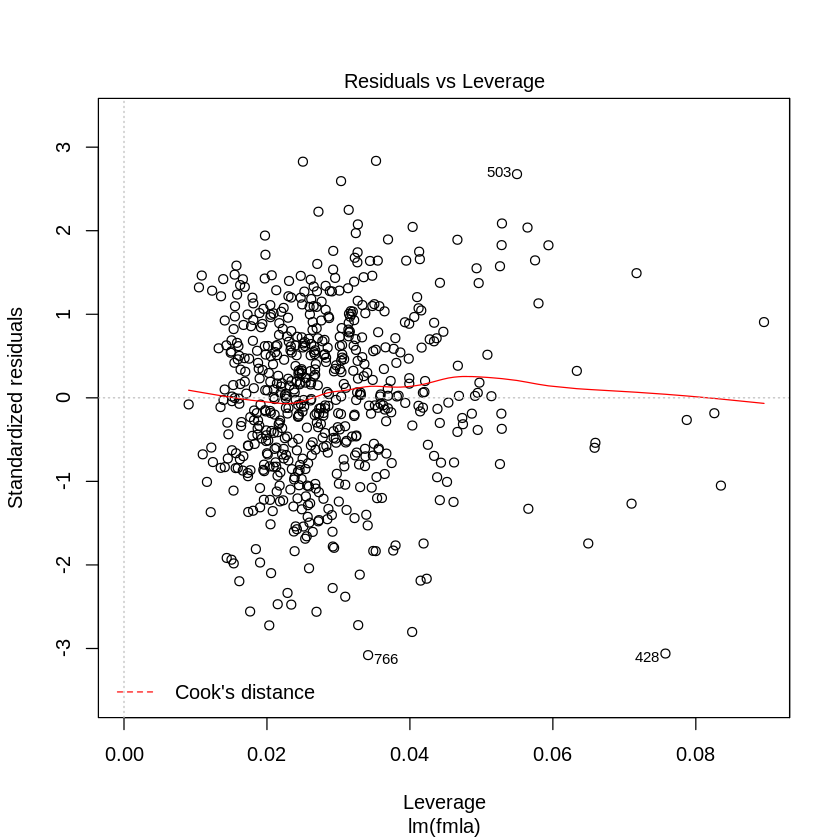

In [90]:
plot(mod)